# Olympic history EDA (Exploratory Data Analysis) using Pandas and Matplotlib

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


# Load data sheet:

In [2]:
df=pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

# Understanding Data Sheet:

In [3]:
print(df.head()) #  Initial 5 rows of the dataset

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
print(df.shape) #  Shape of the dataset (rows, columns)

(271116, 15)


In [5]:
print(df.columns) #  Column names

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [6]:
#  Maximum and Minimum Olympic Years in Dataset

print(df['Year'].max())
print(df['Year'].min())

2016
1896


# Data cleaning:

In [7]:
print(df.isnull().sum()) # Total NAN values in each column

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [8]:
df.drop_duplicates(inplace=True) # remove duplicate rows

In [9]:
print(df.shape) #  Shape of the dataset (rows, columns)

(269731, 15)





*Initially, there were 271,116 rows, but after removing duplicate rows, only 269,731 rows remain. So, (271,116 - 269,731) = 1,385 rows were removed.*

*Note: These duplicate rows might not be truly duplicates since the dataset has many NaN values in the Age, Height, and Weight columns, which might have caused them to be considered as duplicates. Please perform this step cautiously.*

*Instead we can run this command duplicate=df[df.duplicated(subset=['ID', 'Year', 'Sport', 'Event'])].This will check duplicate rows based on the specified columns.*






In [10]:
df.reset_index(drop=True,inplace=True) # reseting index

In [11]:
# Splitting 'Games' column into 'Year' and 'Season
df['Year'] = df['Games'].str.split(' ').str[0]
df['Games'] = df['Games'].str.split(' ').str[1]
df.rename(columns={'Games': 'Season'}, inplace=True)


# Our working Dataset is now ready
# Lets do Exploratory Data Analysis (EDA)


# 1. Medal Distribution by category Gold Silver or Bronze(1896-2016)

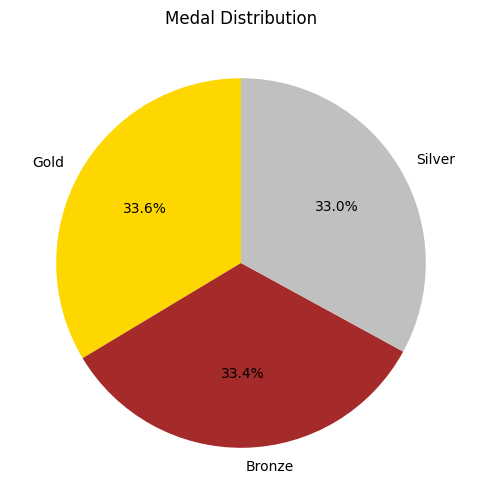

In [12]:
medal_counts = df['Medal'].value_counts()
plt.figure(figsize=(8, 6))
medal_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold','brown', 'silver'])
plt.title('Medal Distribution')
plt.ylabel('')  # To remove the label on the y-axis
plt.show()



# 2. Sex Distribution(1896-2016)

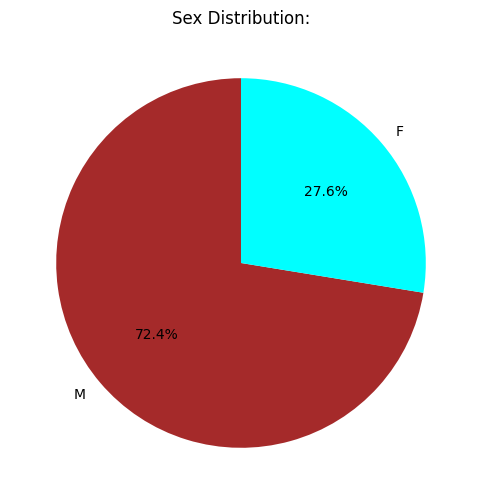

In [13]:
sex_counts=df['Sex'].value_counts()
plt.figure(figsize=(8,6))
sex_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['brown','cyan'])
plt.title("Sex Distribution:")
plt.ylabel('')
plt.show()

# 3.Top 10 Most Popular Sports(by frequency):

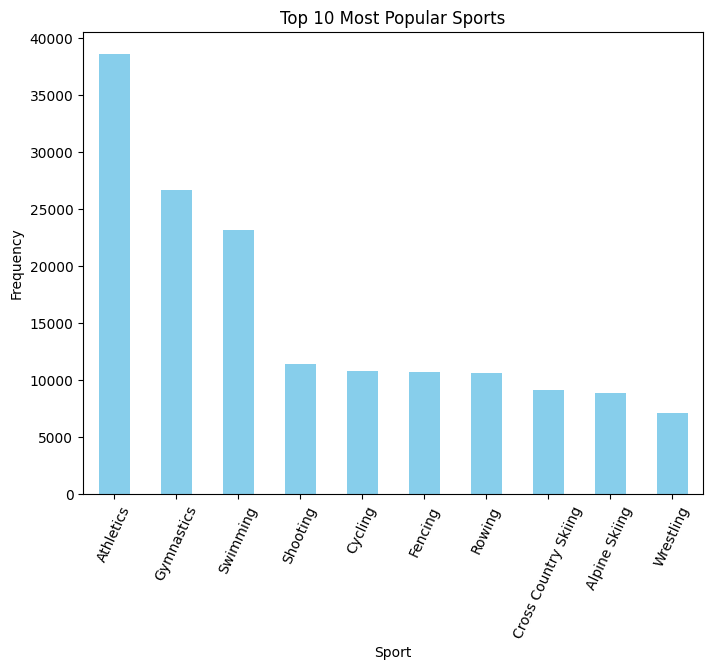

In [14]:
sports_count=df['Sport'].value_counts().head(10)
plt.figure(figsize=(8,6))
sports_count.plot(kind='bar',color='skyblue')
plt.title("Top 10 Most Popular Sports")
plt.xlabel("Sport")
plt.ylabel("Frequency")
plt.xticks(rotation=65)
plt.show()

# 4. Top 5 Most Frequently Participating Athletes(1986-2016):

In [15]:
print(df[["Name","ID"]].value_counts().head(5))

Name                      ID    
Heikki Ilmari Savolainen  106296    39
Joseph "Josy" Stoffel     115354    38
Ioannis Theofilakis       119591    36
Takashi Ono               89187     32
Andreas Wecker            129196    32
Name: count, dtype: int64


In [16]:
df_medals = df[df['Medal'].notna()].copy() # df_medals contains only rows where athletes won a medal i.e bronze or silver or gold(copy() makes df_medals a full independent dataframe from main df )


*df['Medal'].notna() will give a Boolean mask is a sequence of True and False values (or a Boolean array) that is used to filter or select specific rows or columns from a DataFrame or Series in pandas.*

*True: row included*

*False: row excluded*



# 5. Top 10 Teams Who Won the Most Total Medals

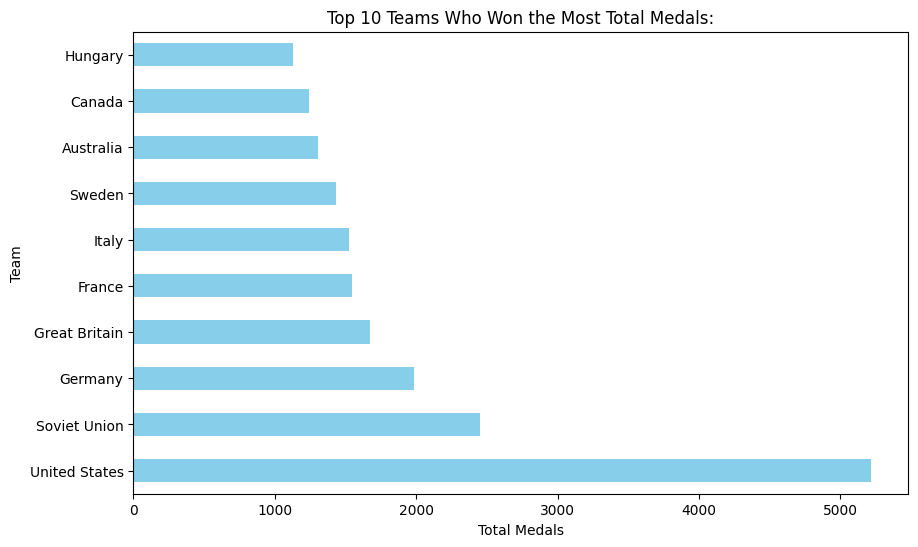

In [17]:
team_medal_counts=df_medals['Team'].value_counts().head(10)
plt.figure(figsize=(10,6))
team_medal_counts.plot(kind='barh',color='skyblue')
plt.title("Top 10 Teams Who Won the Most Total Medals:")
plt.xlabel("Total Medals")
plt.ylabel("Team")
plt.show()

# 6. Top 10 Athletes with Most Medals

In [18]:
athelete_medal_counts=df_medals[['Name','ID']].value_counts().head(10)
print(athelete_medal_counts)

Name                                             ID    
Michael Fred Phelps, II                          94406     28
Larysa Semenivna Latynina (Diriy-)               67046     18
Nikolay Yefimovich Andrianov                     4198      15
Borys Anfiyanovych Shakhlin                      109161    13
Takashi Ono                                      89187     13
Ole Einar Bjrndalen                              11951     13
Edoardo Mangiarotti                              74420     13
Dara Grace Torres (-Hoffman, -Minas)             121258    12
Ryan Steven Lochte                               70965     12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  119922    12
Name: count, dtype: int64


# 7. Number of Medal Winners each Year

Text(0, 0.5, 'No of medal Wineers')

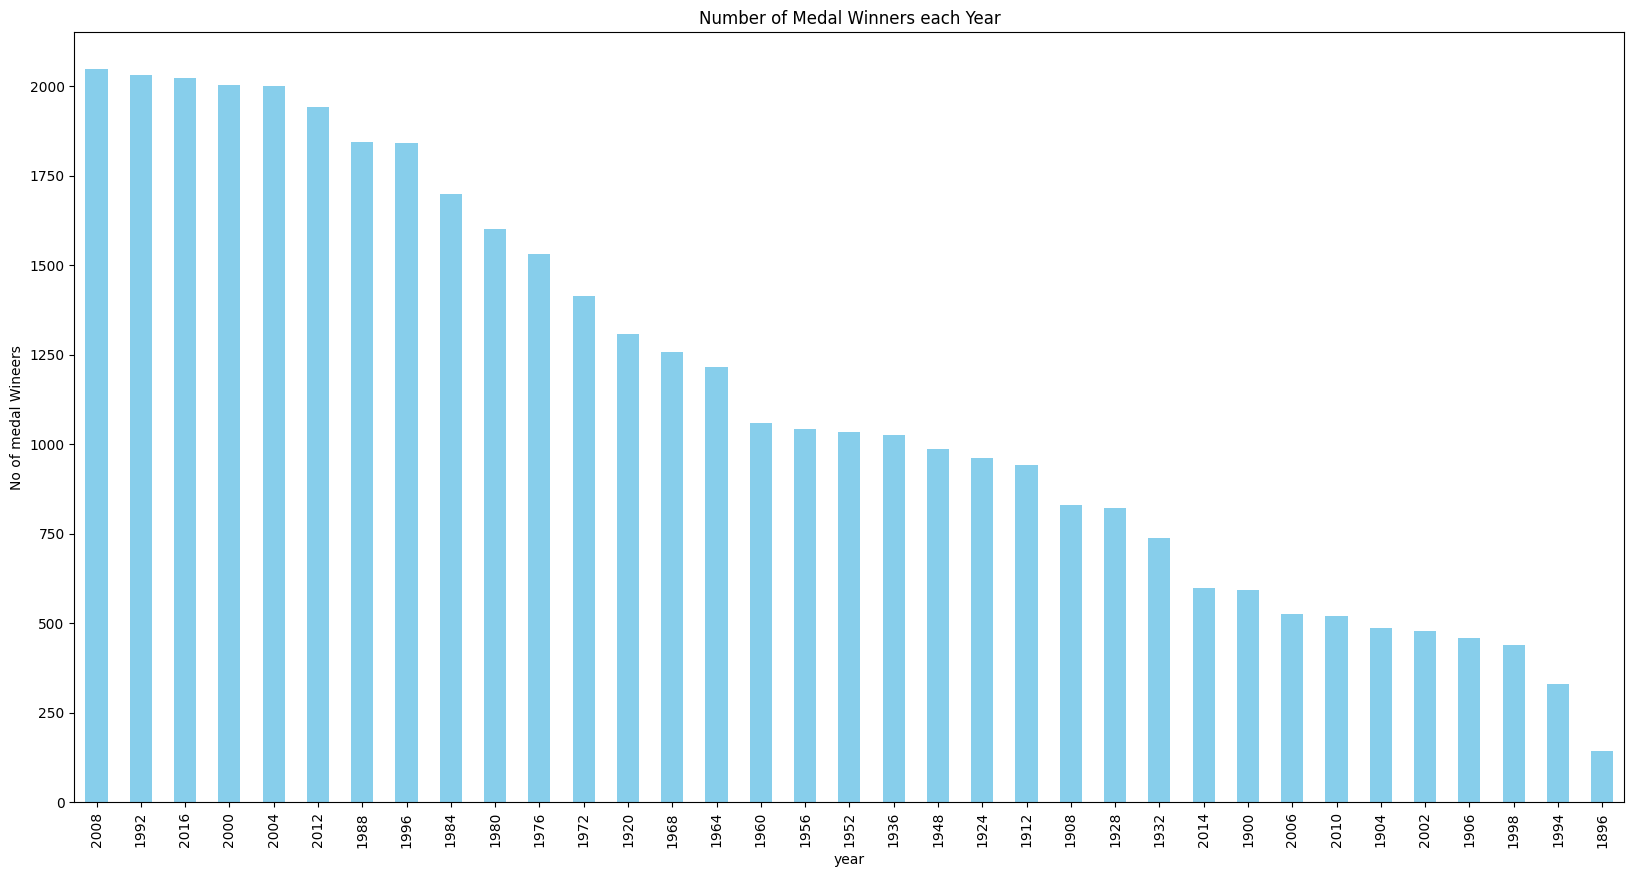

In [19]:
x=df_medals["Year"].value_counts()
plt.figure(figsize=(20,10))
x.plot(kind='bar',color='skyblue')
plt.title('Number of Medal Winners each Year')
plt.xlabel('year')
plt.ylabel('No of medal Wineers')

# 8. Calculating BMI:

BMI_Category
Healthy Weight    60.973711
Obese             24.948931
Overweight        11.074737
Underweight        3.002621
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x7e2d182493d0>,
 [Text(-1.0352762441140966, -0.3717567731366974, 'Healthy Weight '),
  Text(1.0947752717267492, -0.10708456665468963, 'Obese'),
  Text(0.5623228652720317, 0.9454062593362986, 'Overweight'),
  Text(0.10360944096097902, 1.0951096217930667, 'Underweight')],
 [Text(-0.5646961331531435, -0.20277642171092583, '61.0%'),
  Text(0.5971501482145904, -0.0584097636298307, '24.9%'),
  Text(0.3067215628756536, 0.5156761414561628, '11.1%'),
  Text(0.05651424052417037, 0.5973325209780364, '3.0%')])

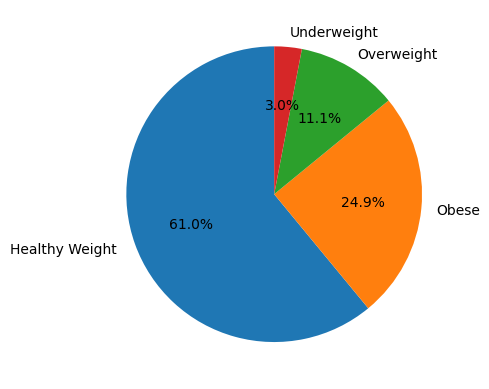

In [20]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
df1=df.copy() # make a copy of df to df1

df1['Height_in_meters']= df['Height'] / 100  # modifying the Height coloumn values in df1

# df1 contains only height in meters

df['BMI'] = df['Weight'] / (df1['Height_in_meters'] ** 2) # adding a new coloumn BMI in df 

df['BMI_Category'] = df['BMI'].apply(categorize_bmi) # adding a new coloumn BMI_Category and applying a function called categorize_bmi to all of the rows in df
print(df['BMI_Category'].value_counts(normalize=True) * 100)
# pie chart
categories = ['Healthy Weight ', 'Obese', 'Overweight', 'Underweight']
values= [60.973711, 24.948931, 11.074737, 3.002621] 
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)

# 9. Average Height, Weight and BMI of Athletes in Each Sport

Using Bar Chart:


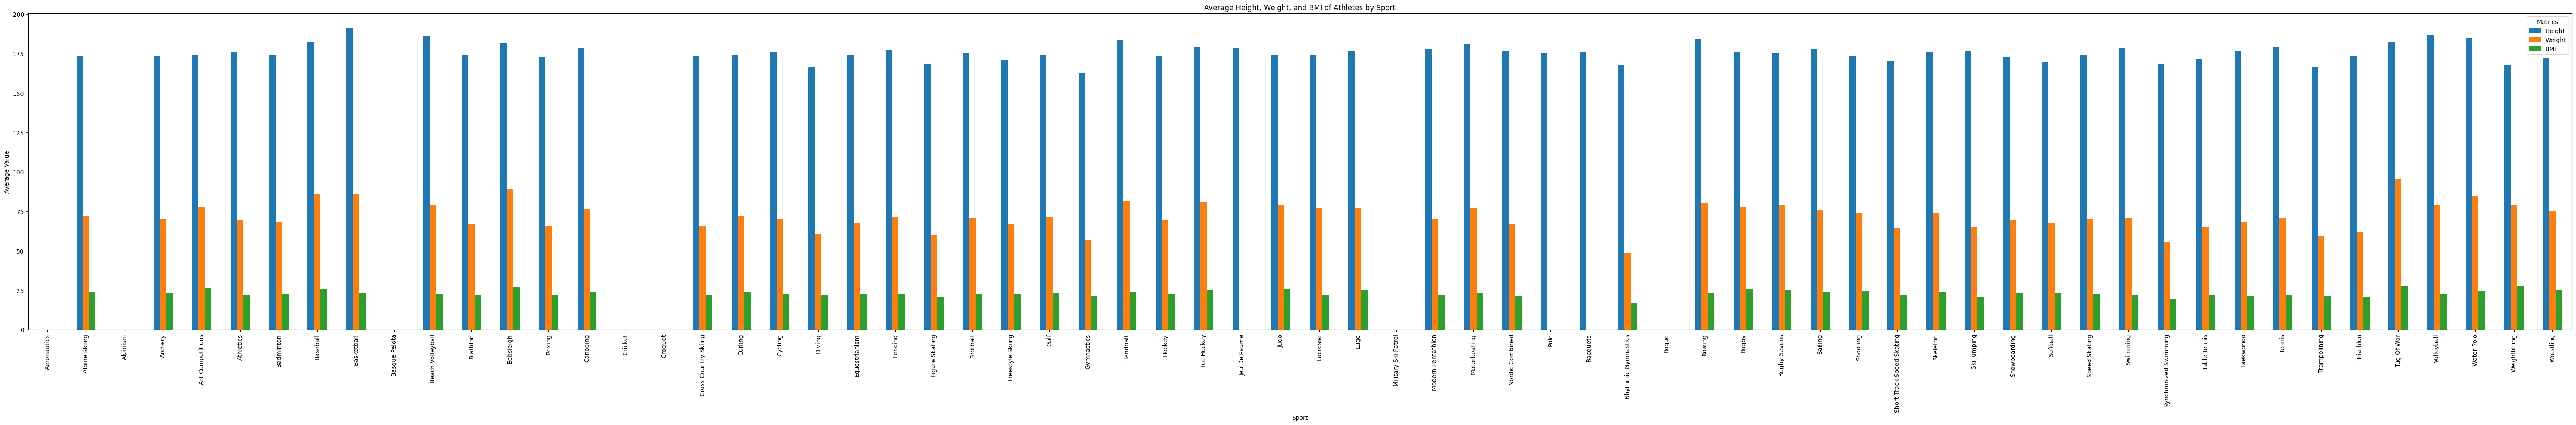

Using Heatmap:


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


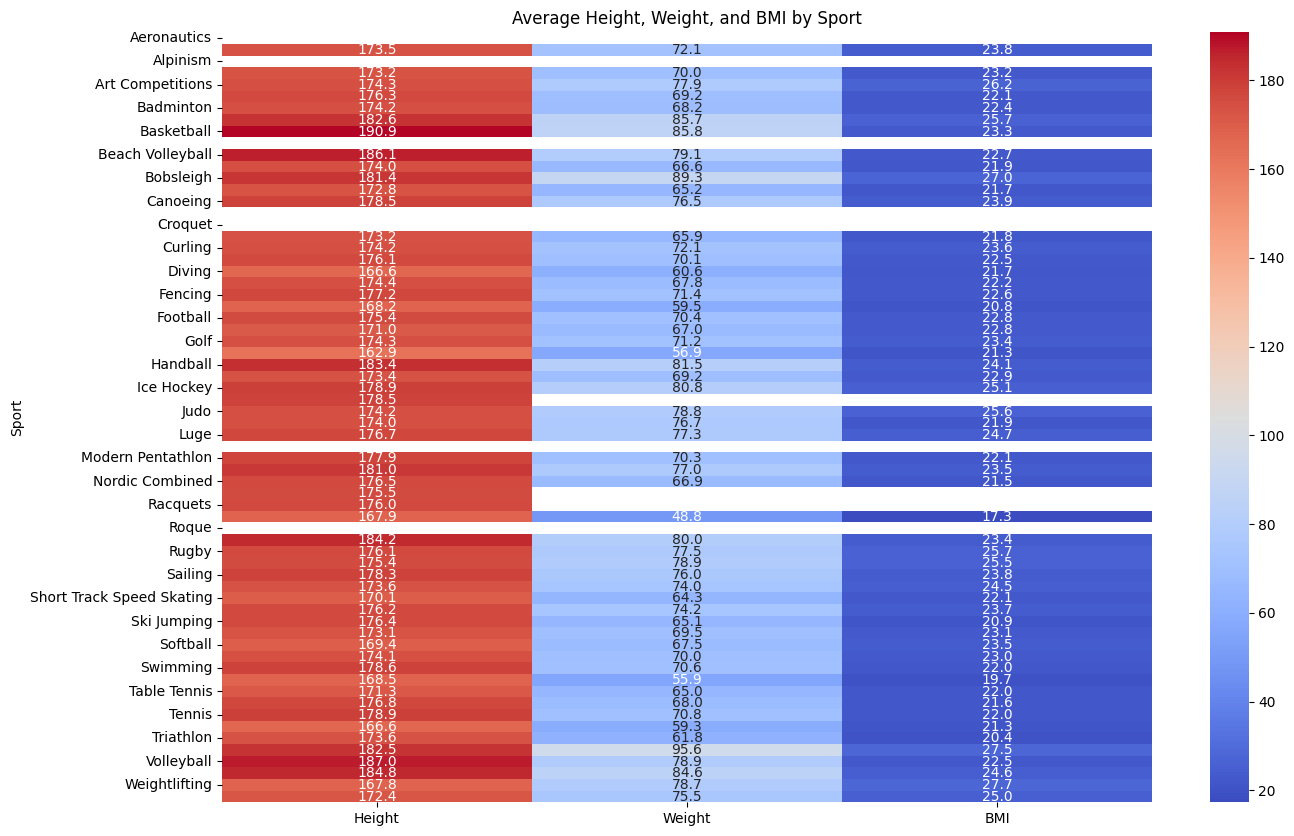

In [21]:
# Calculate averages
avg_stats = df.groupby('Sport')[['Height', 'Weight', 'BMI']].mean()

# Plot grouped bar plot
print("Using Bar Chart:")
avg_stats.plot(kind='bar', figsize=(60, 10))
plt.title('Average Height, Weight, and BMI of Athletes by Sport')
plt.xlabel('Sport')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


print("Using Heatmap:")

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(avg_stats, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Height, Weight, and BMI by Sport')
plt.ylabel('Sport')
plt.show()


# 10. Most Popular Sports for Female Athletes

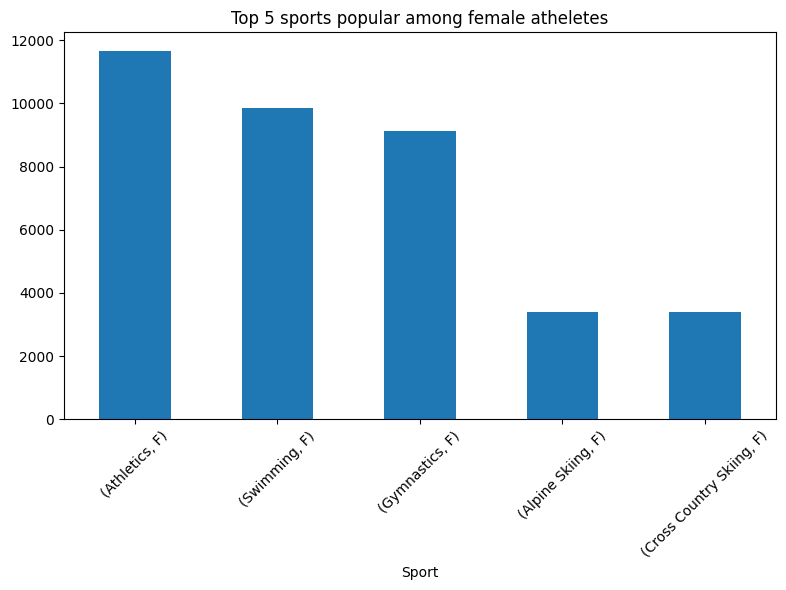

In [22]:
# Filter first for 'F' in Sex, then group by Sport
df_filtered = df[df['Sex'] == 'F'] # boolean masking
# df_filtered contains only rows where sex is Female 
# use boolean msking when you want to filter rows
x=df_filtered.groupby('Sport')['Sex'].value_counts().sort_values(ascending=False).head(5)
x.plot(kind='bar', figsize=(8, 6))
plt.title('Top 5 sports popular among female atheletes')
plt.xlabel('Sport')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11. Team vs Year Medal Count Matrix over years

In [23]:
print(df_medals.groupby(['Year', 'Team'])['Medal'].count().unstack(fill_value=0).T)

Year                          1896  1900  1904  1906  1908  1912  1920  1924  \
Team                                                                           
A North American Team            0     4     0     0     0     0     0     0   
Afghanistan                      0     0     0     0     0     0     0     0   
Algeria                          0     0     0     0     0     0     0     0   
Ali-Baba II                      0     0     0     0     0     0     0     0   
Amateur Athletic Association     0     5     0     0     0     0     0     0   
...                            ...   ...   ...   ...   ...   ...   ...   ...   
Winnipeg Shamrocks-1             0     0    12     0     0     0     0     0   
Yugoslavia                       0     0     0     0     0     0     0     2   
Zambia                           0     0     0     0     0     0     0     0   
Zimbabwe                         0     0     0     0     0     0     0     0   
Zut                              0     0

# 12. Heaviest and Tallest Athletes in each Sport

In [24]:
print(df.loc[df.groupby('Sport')['Weight'].idxmax().dropna()][['Sport', 'Name', 'Weight']])
print('\n\n')
print(df.loc[df.groupby('Sport')['Height'].idxmax().dropna()][['Sport', 'Name', 'Height']])


                            Sport                                    Name  \
86869               Alpine Skiing                Brynjar Jkull Gumundsson   
189052                    Archery                           Pierre Plihon   
196529           Art Competitions                  Michel Joseph Ravarino   
63036                   Athletics                           Ion Emilianov   
88399                   Badminton                        rni r Hallgrmson   
134062                   Baseball                              Lee Dae-Ho   
212893                 Basketball                  Sofoklis Schortsanitis   
192644           Beach Volleyball                          Julien Prosser   
60914                    Biathlon                             Alfred Eder   
258264                  Bobsleigh             Floyd Edward "Hank" Whisher   
261172                     Boxing                          Paea Wolfgramm   
57530                    Canoeing                             Josef Dostl   

# 13. Male vs Female Athlete Trend Over the Years

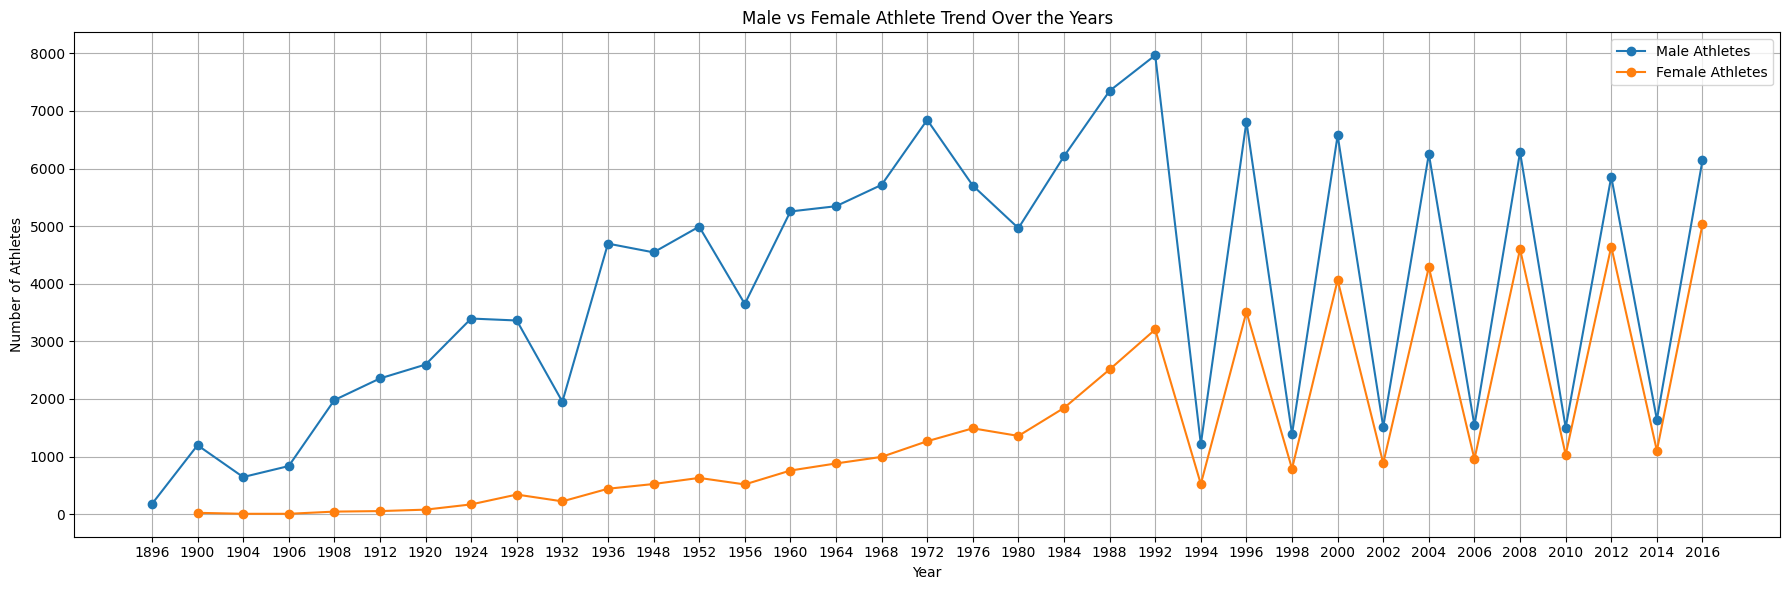

In [25]:
# Group data
gender_trend = df.groupby(['Year', 'Sex'])['Name'].nunique().unstack()

# Plot
plt.figure(figsize=(18, 6))
plt.plot(gender_trend.index, gender_trend['M'], label='Male Athletes', marker='o')
plt.plot(gender_trend.index, gender_trend['F'], label='Female Athletes', marker='o')
plt.title('Male vs Female Athlete Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 14. Age Group Distribution Among Medal Winners:

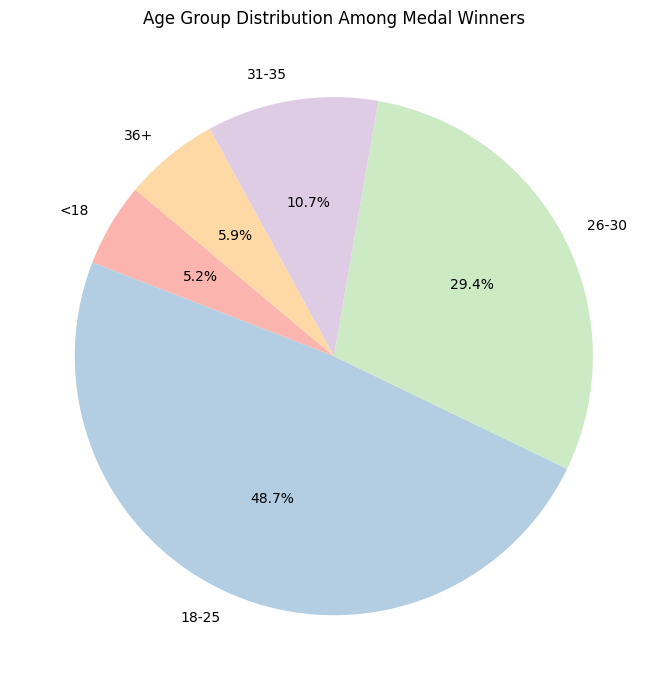

In [26]:
bins = [0, 18, 25, 30, 35, 100] # age intervals(n)
labels = ['<18', '18-25', '26-30', '31-35', '36+'] # label names(n-1)
df_medals['Age_Group'] = pd.cut(df_medals['Age'], bins=bins, labels=labels)
age_group_distribution = (df_medals['Age_Group'].value_counts(normalize=True) * 100).sort_index()
# Plot
plt.figure(figsize=(7, 7))
age_group_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)

plt.title('Age Group Distribution Among Medal Winners')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()


# 15. Top 5 Cities That Hosted the Olympics Most Frequently

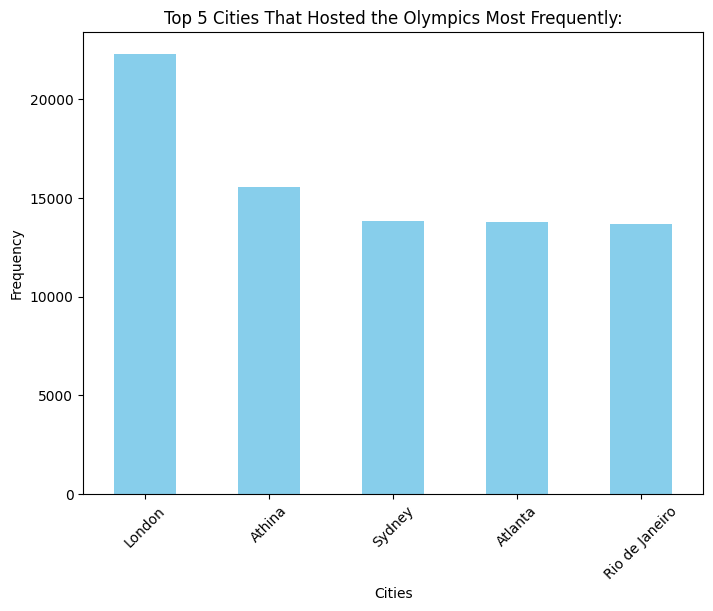

In [27]:
x=df["City"].value_counts().head(5)
x.plot(kind='bar',color='skyblue',figsize=(8,6))
plt.title('Top 5 Cities That Hosted the Olympics Most Frequently:')
plt.xlabel('Cities')
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# 16 .You can download our final .csv file also to see the modifications

In [28]:
df.to_csv('modified.csv', index=False)
# you can see the downloaded .csv file in the ''/kaggle/working' directory in Output section